# Data loading and inspection 

In [26]:
#Importing the necessary libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import FreqDist

#modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

#imbalance libraries 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.metrics import accuracy_score



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lyster\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lyster\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lyster\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:

# Import necessary classes from the init module
from __init__ import Explore, Clean

In [28]:
#load the data and print first five rows to ensure it loaded correctly
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [29]:
#create instance of explore class
explore_df = Explore(data)

In [30]:
# Check the shape of the data
explore_df.shape()

----------------Shape of the Dataset---------------- 

(9093, 3)


In [31]:
#Check the columns of the data
explore_df.features()

----------------Features in the Dataset---------------- 

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')


In [32]:
#Check the summary statistics of the data
explore_df.stats()

----------------Summary Statistics of the Features---------------- 

                                               tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             3291   
unique                               9   
top                               iPad   
freq                               946   

       is_there_an_emotion_directed_at_a_brand_or_product  
count                                                9093  
unique                                                  4  
top                    No emotion toward brand or product  
freq                                                 5389  


In [33]:
#Check the basic information of the data
explore_df.info()

----------------Dataset Overall Information---------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


In [34]:
#Renaming the columns
def rename_columns(df):
    df.columns=['tweet_text',  'recipient', 'emotion']
    return df
data = rename_columns(data)
data.head()

,tweet_text,recipient,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [35]:
# Initialize the cleaning class and call the method for displaying missing values
clean_df = Clean(data)
clean_df.missing_duplicated()



 Duplicated Rows:

- Total duplicated rows: 22 
 



,Missing Values,Percentage(%)
recipient,5802,63.807324
tweet_text,1,0.010997
emotion,0,0.000000


In [36]:
# Drop the missing record in the tweet_text column
data = data.dropna(subset=['tweet_text'])
#Check to ensure the missing record is dropped
data.isnull().sum()

tweet_text       0
recipient     5801
emotion          0
dtype: int64

In [37]:
# Fill missing values in the 'recipient' column with 'No brand'
data['recipient'].fillna('No brand', inplace=True)

C:\Users\Lyster\AppData\Local\Temp\ipykernel_21148\2107247772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recipient'].fillna('No brand', inplace=True)


In [38]:
#Drop the duplicate rows
clean_df.remove_duplicated_rows()

'The dataset now has 0 duplicate rows'

We'll also focus on cleaning the emotion column by simplifying the emotion labels by converting them:

'Positive Emotion'->'Positive'

'Negative Emotion'->'Negative'

'No emotion toward brand or product' and 'I can't tell'->'Neutral

This standardization will make sentiment classification easier and more consistent for analysis and modeling.

In [39]:

# Change emotions to 'Positive', 'Negative', and 'Neutral'
data.loc[data['emotion'] == 'No emotion toward brand or product', 'emotion'] = 'Neutral'
data.loc[data['emotion'] == 'Positive emotion', 'emotion'] = 'Positive'
data.loc[data['emotion'] == 'Negative emotion', 'emotion'] = 'Negative'
data.loc[data['emotion'] == "I can't tell", 'emotion'] = 'Neutral'

data.head()

C:\Users\Lyster\AppData\Local\Temp\ipykernel_21148\2451357721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['emotion'] == 'No emotion toward brand or product', 'emotion'] = 'Neutral'
C:\Users\Lyster\AppData\Local\Temp\ipykernel_21148\2451357721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['emotion'] == 'Positive emotion', 'emotion'] = 'Positive'
C:\Users\Lyster\AppData\Local\Temp\ipykernel_21148\2451357721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,tweet_text,recipient,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


### Feature engineering 

In [44]:
data['brand'] = data['recipient'].map({'Other Apple product or service': 'Apple', 
                                           'Android': 'Google',
                                           'Android App': 'Google',
                                           'Other Google product or service ': 'Google',
                                           'iPhone': 'Apple', 
                                           'Google':'Google',
                                           'iPad or iPhone App': 'Apple',
                                           'Apple':'Apple',
                                           'iPad':'Apple',
                                           'No brand': 'none'})

data['brand'].value_counts()

C:\Users\Lyster\AppData\Local\Temp\ipykernel_21148\2519186113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['brand'] = data['recipient'].map({'Other Apple product or service': 'Apple',


brand
none      5801
Apple     2409
Google     589
Name: count, dtype: int64

# Exploratory data analysis (EDA)

#### Univariate analysis

emotion
Neutral     60.976683
Positive    32.754070
Negative     6.269248
Name: proportion, dtype: float64


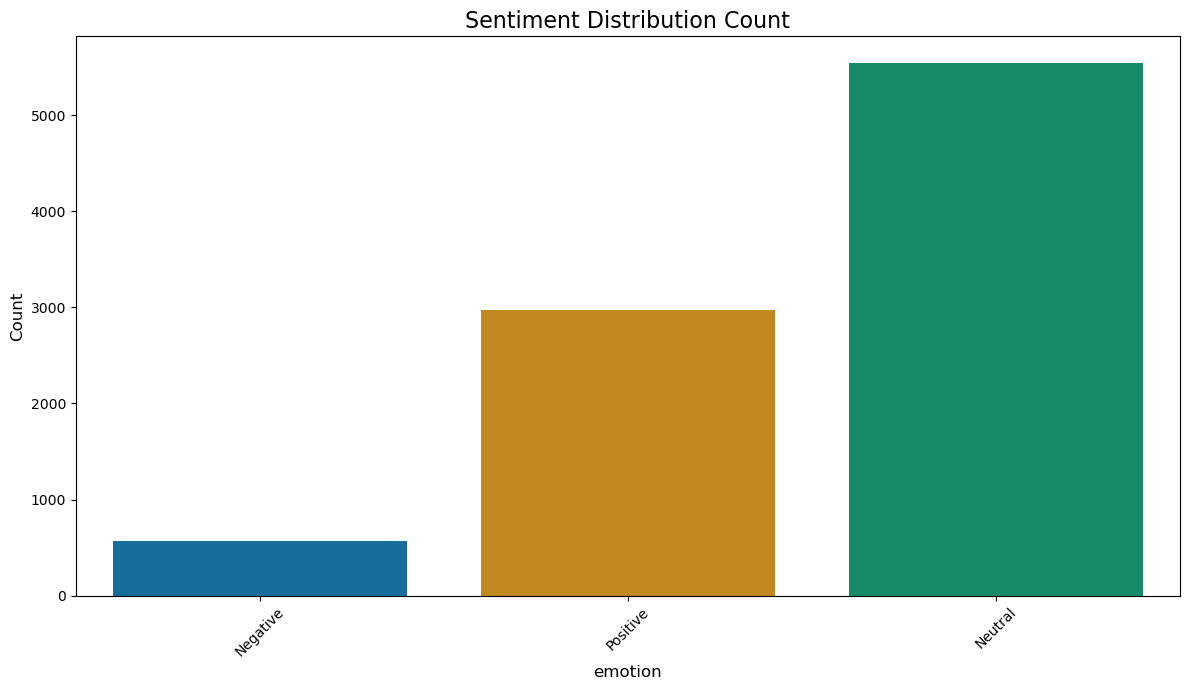

In [45]:
#checking the distribution of sentiments
percentage = data['emotion'].value_counts(normalize=True)
print(percentage * 100)

#Count plot of the 'emotion' column
plt.figure(figsize=(12, 7))
sns.countplot(x='emotion', data=data, palette='colorblind')
plt.title('Sentiment Distribution Count', fontsize=16)
plt.xlabel('emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if they’re long
plt.tight_layout()
plt.show()

brand
none      65.927946
Apple     27.378111
Google     6.693942
Name: proportion, dtype: float64


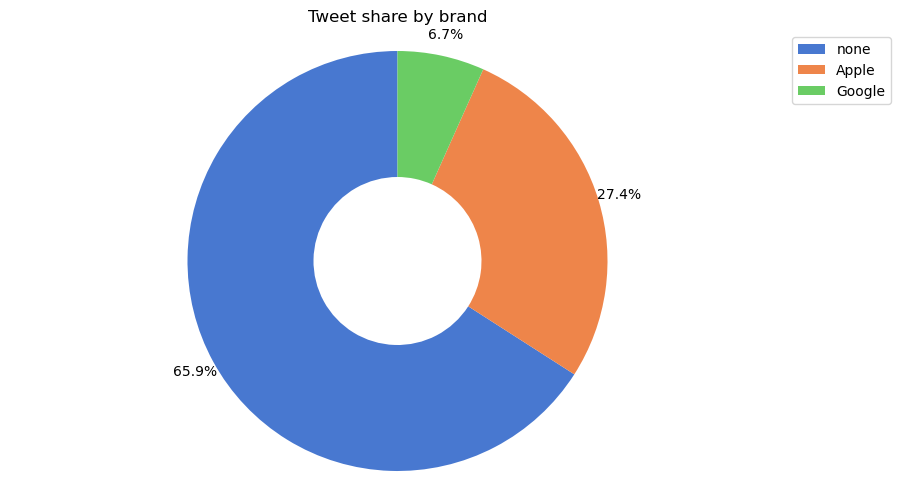

In [46]:
#pie chart to visualize Tweet share by brand
brand_share = data['brand'].value_counts(normalize=True)
print(brand_share * 100)

#Visualizing using pie chart
plt.figure(figsize=(10, 6))
plt.pie(brand_share.values, autopct='%1.1f%%', pctdistance=1.1, startangle=90, colors=sns.color_palette('muted'), wedgeprops={'width': 0.6})
plt.title('Tweet share by brand')
plt.axis('equal')
plt.legend(labels=brand_share.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


C:\Users\Lyster\AppData\Local\Temp\ipykernel_21148\40650347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_length'] = data['tweet_text'].apply(lambda x: len(str(x).split()))


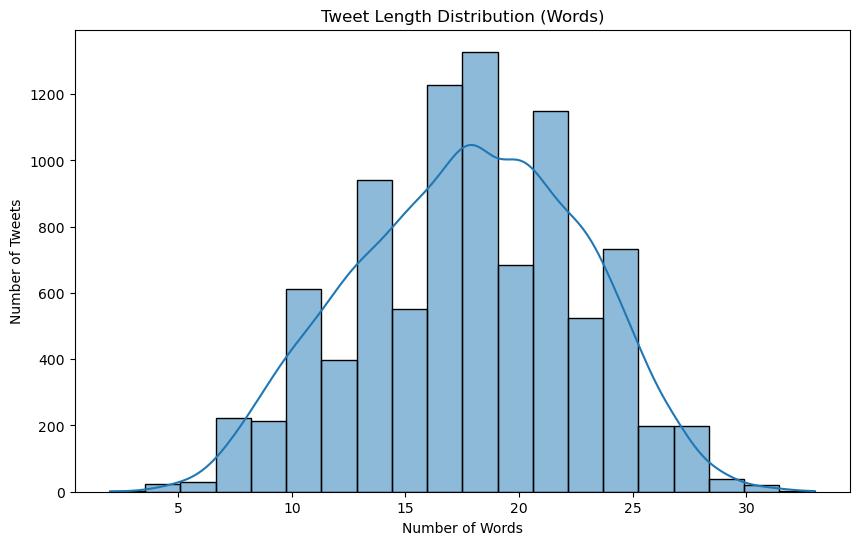

In [47]:
# Count number of words in each tweet (not characters)
data['tweet_length'] = data['tweet_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['tweet_length'], bins=20, kde=True)
plt.title('Tweet Length Distribution (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.show()

### Bivariate analysis

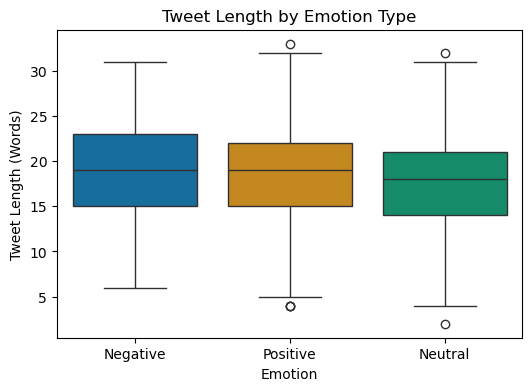

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='emotion', y='tweet_length', palette='colorblind')
plt.title('Tweet Length by Emotion Type')
plt.xlabel('Emotion')
plt.ylabel('Tweet Length (Words)')
plt.show()


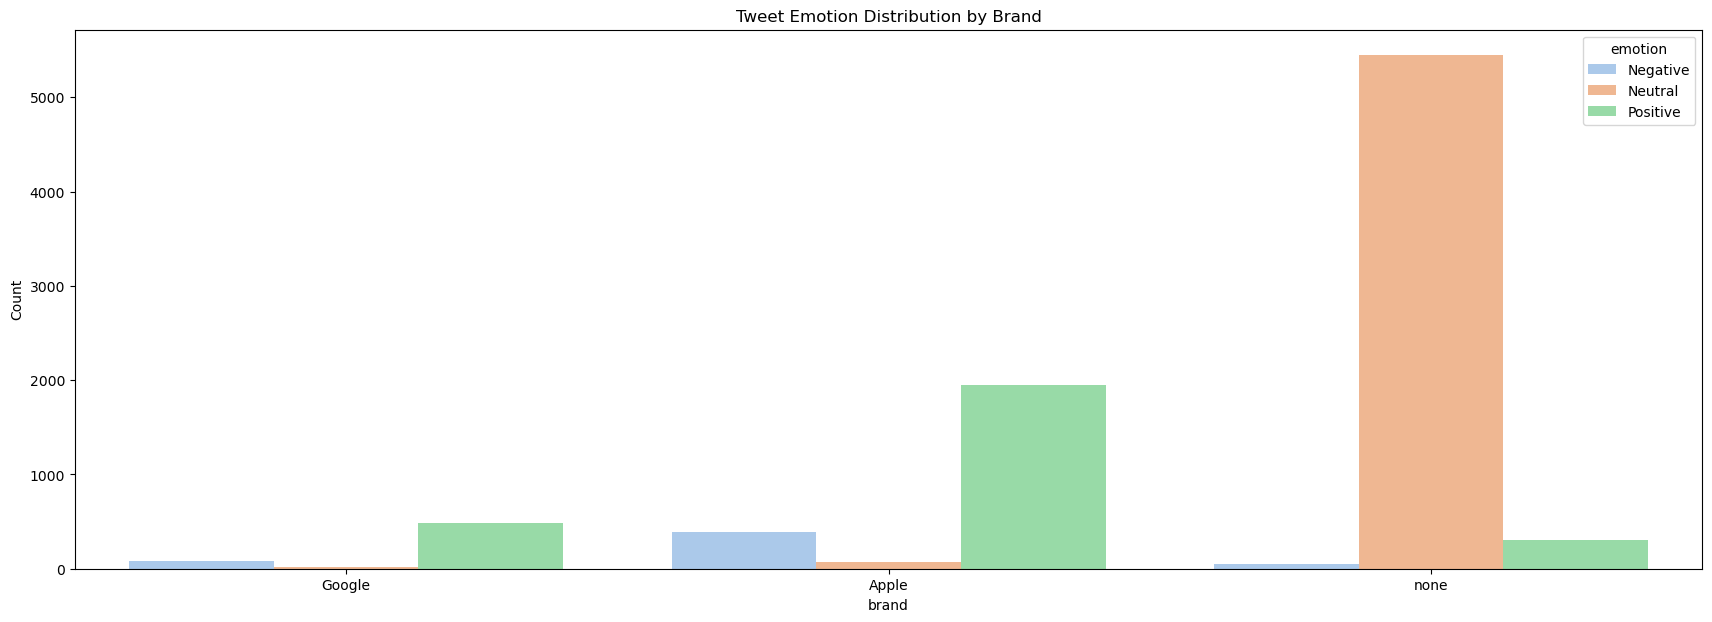

In [54]:

#Which brand is getting more positive or negative tweets?
brands = data.groupby(['brand','emotion']).size().reset_index(name='count')

#Calculate the ascending order of states based on churn count
ascending_order = brand_group.groupby('brand')['count'].sum().sort_values().index

plt.figure(figsize=(21,7))
sns.barplot(x='brand', y='count', hue='emotion', data=brands,palette='pastel', order=ascending_order)
plt.xlabel('brand')
plt.ylabel('Count')
plt.title('Tweet Emotion Distribution by Brand')
plt.show()